In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [26]:
dir_data='./Data/home-credit-default-risk/'
f_app_home= os.path.join(dir_data,'application_train.csv')
app_train  = pd.read_csv(f_app_home)
app_train .describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,65499.000000,65499.000000,65499.000000,6.549900e+04,6.549900e+04,65494.000000,6.544600e+04,65499.000000,65499.000000,65499.000000,...,65499.000000,65499.000000,65499.000000,65499.000000,56714.000000,56714.000000,56714.000000,56714.000000,56714.000000,56714.000000
mean,137986.370158,0.080551,0.419411,1.697625e+05,5.993744e+05,27073.572327,5.386597e+05,0.020867,-16027.294692,63224.604635,...,0.008321,0.000718,0.000458,0.000321,0.007106,0.007635,0.033008,0.269034,0.263885,1.885266
std,21882.306074,0.272146,0.724368,4.668740e+05,4.026647e+05,14487.004992,3.699266e+05,0.013767,4361.907096,140795.498287,...,0.090838,0.026778,0.021397,0.017903,0.088694,0.110756,0.199280,0.924256,0.611959,1.869598
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25201.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,119098.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19657.000000,-2784.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,137956.000000,0.000000,0.000000,1.440000e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1217.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,156875.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34587.000000,6.795000e+05,0.028663,-12390.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,175957.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


In [28]:

dtype_select = [int]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])


In [35]:
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns" , len(numeric_columns))

Numbers of remain columns 9


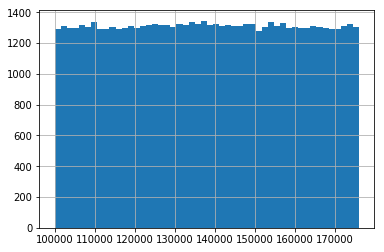

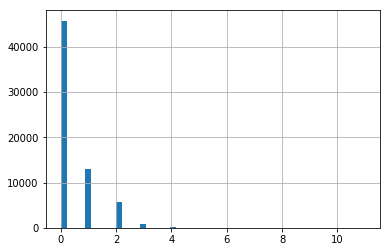

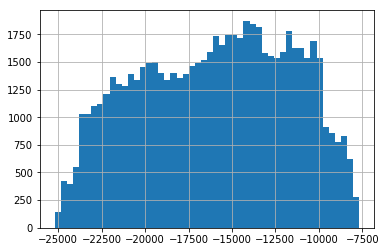

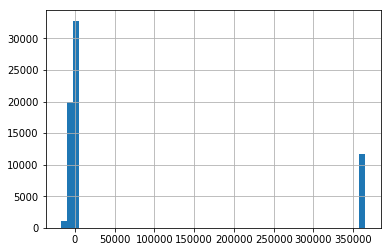

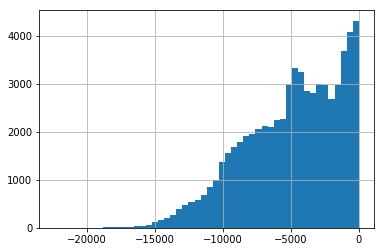

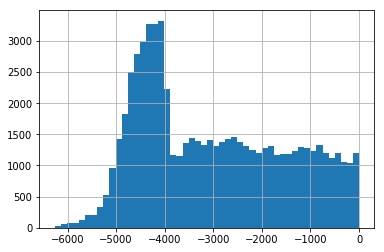

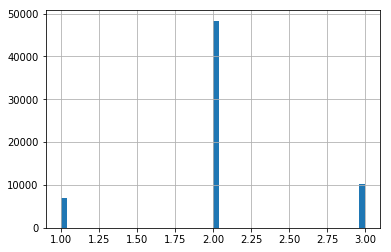

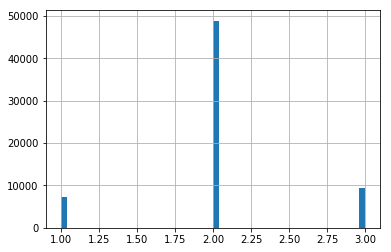

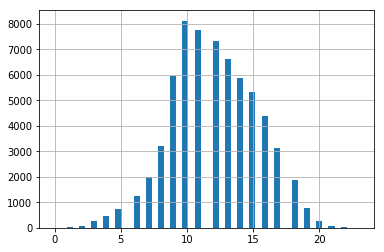

In [37]:
# 檢視這些欄位的數值範圍
for col in numeric_columns:
    app_train[col].hist(bins=50)
    
    plt.show()

In [39]:
app_train[numeric_columns].describe()

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START
count,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000
mean,137986.370158,0.419411,-16027.294692,63224.604635,-4979.313883,-2994.017939,2.052642,2.031695,12.050886
std,21882.306074,0.724368,4361.907096,140795.498287,3522.794320,1511.855646,0.508928,0.502949,3.257430
min,100002.000000,0.000000,-25201.000000,-17531.000000,-22392.000000,-6265.000000,1.000000,1.000000,0.000000
25%,119098.500000,0.000000,-19657.000000,-2784.000000,-7465.000000,-4297.000000,2.000000,2.000000,10.000000
50%,137956.000000,0.000000,-15750.000000,-1217.000000,-4490.000000,-3258.000000,2.000000,2.000000,12.000000
75%,156875.500000,1.000000,-12390.000000,-289.000000,-2008.000000,-1716.000000,2.000000,2.000000,14.000000
max,175957.000000,11.000000,-7676.000000,365243.000000,0.000000,0.000000,3.000000,3.000000,23.000000


In [ ]:
#第4,7,8筆資料似乎可疑，可能有outliers